<a href="https://colab.research.google.com/github/fwere12/Anaemia-Prediction/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Reading in our datasets
df1 = pd.read_csv("/content/d_output.csv")
df1.head(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes


In [3]:
df2 = pd.read_csv("/content/expanded_output.csv")
df2.head(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.264176,30.838924,25.899587,6.297293,Yes
1,2,F,43.144832,30.171404,26.692997,8.608315,Yes
2,3,F,46.506491,27.430905,26.051133,9.713010,Yes
3,4,F,44.963982,30.519205,24.499161,4.809385,Yes
4,5,M,45.069466,31.089378,23.853518,8.995228,Yes


In [4]:
df3 = pd.read_csv("/content/file_.csv")
df3.head(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes


In [6]:
df3.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [7]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,500.0,250.50000,144.481833,1.00,125.75,250.500,375.2500,500.00
%Red Pixel,500.0,44.91358,2.950017,36.80,43.00,44.555,46.4650,56.85
%Green pixel,500.0,29.34972,1.844623,24.15,28.13,29.480,30.6925,33.60
%Blue pixel,500.0,25.57044,2.215913,17.95,24.55,25.935,27.0025,31.30
Hb,500.0,10.89310,3.040943,4.00,8.92,9.950,13.3300,18.55


In [8]:
#Checking for missing values
df3.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [9]:
#Checking for duplicates
df3.duplicated().sum()

0

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [13]:
#dropping number
df3 = df3.drop("Number", axis = 1)
df3["Anaemic"] = df3["Anaemic"].map({"Yes": 1, "No": 0})
features = df3.drop("Anaemic", axis = 1)
labels = df3[["Anaemic"]]

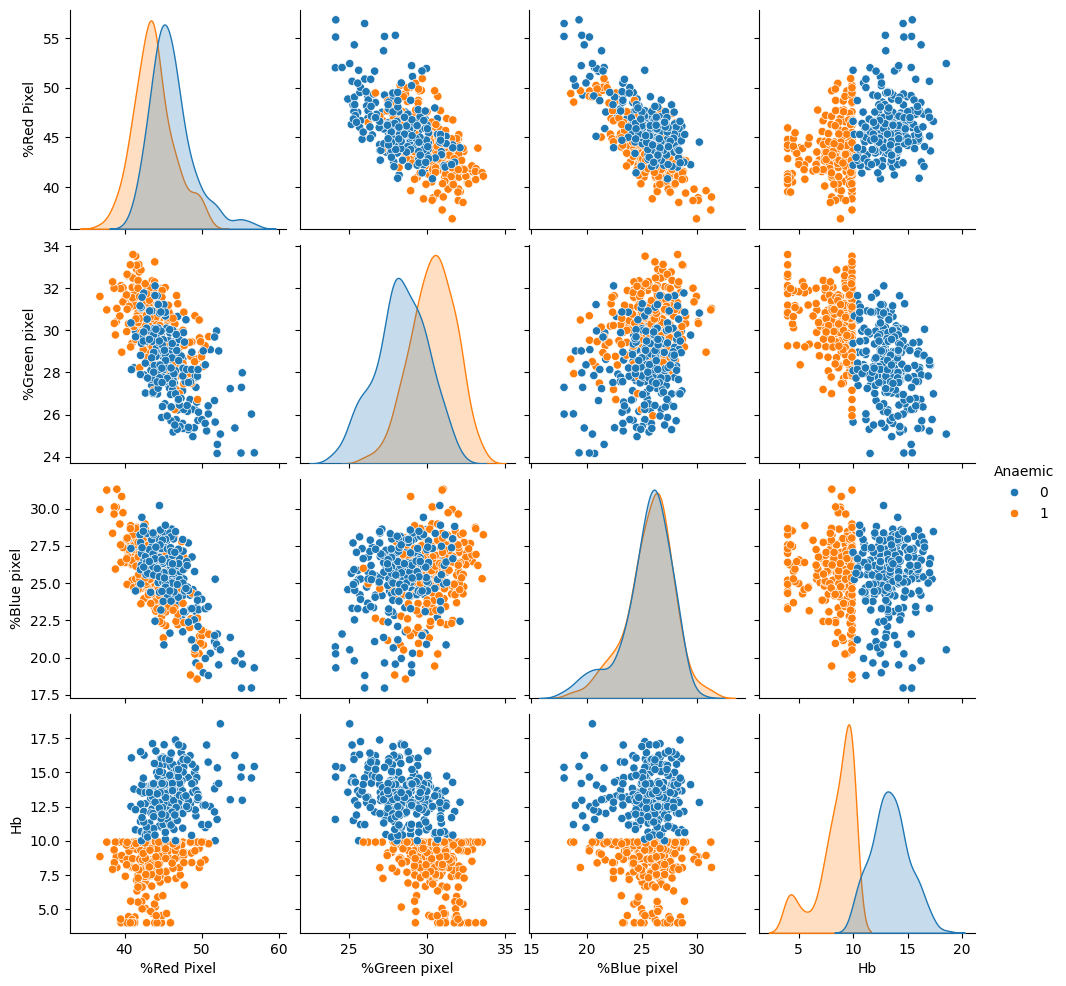

In [15]:
sns.pairplot(df3, hue = "Anaemic")

In [16]:
inconsistent_labels = df3[((df3['Hb'] >= 10) & (df3['Anaemic'] == 1)) | ((df3['Hb'] < 10) & (df3['Anaemic'] == 0))]
print("Inconsistent Labels:\n", inconsistent_labels)

Inconsistent Labels:
 Empty DataFrame
Columns: [Sex, %Red Pixel, %Green pixel, %Blue pixel, Hb, Anaemic]
Index: []
